In [19]:
!pip install explainableai
import os
os.environ['GOOGLE_API_KEY'] = 'API_KEY'

Fitting Logistic Regression...
Fitting Random Forest...
Fitting XGBoost...


c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:14:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting MLP Classifier...

Evaluating Models on Test Set:
Logistic Regression Test Accuracy: 96.49%
Random Forest Test Accuracy: 96.49%
XGBoost Test Accuracy: 97.37%
Neural Network (MLP) Test Accuracy: 97.37%

Training PyTorch Model...
Epoch [10/100], Loss: 0.0223
Epoch [20/100], Loss: 0.0229
Epoch [30/100], Loss: 0.0022
Epoch [40/100], Loss: 0.0048
Epoch [50/100], Loss: 0.0000
Epoch [60/100], Loss: 0.0000
Epoch [70/100], Loss: 0.0013
Epoch [80/100], Loss: 0.0005
Epoch [90/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0000
PyTorch Model Test Accuracy: 98.25%


2024-10-07 16:14:40,727 - explainableai.llm_explanations - DEBUG - Initializing gemini...
2024-10-07 16:14:40,727 - explainableai.llm_explanations - INFO - Gemini initialize successfully...



Performing XAI Analysis on Scikit-learn Models:

Analyzing Logistic Regression...


2024-10-07 16:14:40,746 - explainableai.core - DEBUG - Fitting the model...
2024-10-07 16:14:40,746 - explainableai.core - INFO - Preprocessing data...
2024-10-07 16:14:40,748 - explainableai.core - DEBUG - Creating Preprocessing Steps...
2024-10-07 16:14:40,749 - explainableai.core - INFO - Pre proccessing completed...
2024-10-07 16:14:40,749 - explainableai.core - DEBUG - Fitting and transforming the data...
2024-10-07 16:14:40,760 - explainableai.core - DEBUG - Updating feature names...
2024-10-07 16:14:40,761 - explainableai.core - INFO - Fitting models and analyzing...
2024-10-07 16:14:40,762 - explainableai.core - DEBUG - Comparing the models...
2024-10-07 16:14:41,777 - explainableai.core - INFO - Comparing successfully...
2024-10-07 16:14:41,997 - explainableai.core - INFO - Model fitting is complete...
2024-10-07 16:14:41,997 - explainableai.core - DEBUG - Analysing...
2024-10-07 16:14:41,997 - explainableai.core - INFO - Evaluating model performance...
2024-10-07 16:14:41,997

Results for Logistic Regression:
{'model_performance': {'accuracy': 0.989010989010989, 'f1_score': np.float64(0.9889904514693614), 'confusion_matrix': array([[165,   4],
       [  1, 285]]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.99       169\n           1       0.99      1.00      0.99       286\n\n    accuracy                           0.99       455\n   macro avg       0.99      0.99      0.99       455\nweighted avg       0.99      0.99      0.99       455\n'}, 'feature_importance': {'mean concave points': np.float64(0.0630769230769231), 'worst texture': np.float64(0.05318681318681322), 'radius error': np.float64(0.044835164835164885), 'worst radius': np.float64(0.04417582417582423), 'worst concavity': np.float64(0.02857142857142859), 'worst area': np.float64(0.0241758241758242), 'worst symmetry': np.float64(0.02197802197802201), 'smoothness error': np.float64(0.007252747252747316), 'compactness er

2024-10-07 16:14:53,852 - explainableai.core - DEBUG - Fitting the model...
2024-10-07 16:14:53,852 - explainableai.core - INFO - Preprocessing data...
2024-10-07 16:14:53,858 - explainableai.core - DEBUG - Creating Preprocessing Steps...
2024-10-07 16:14:53,858 - explainableai.core - INFO - Pre proccessing completed...
2024-10-07 16:14:53,859 - explainableai.core - DEBUG - Fitting and transforming the data...
2024-10-07 16:14:53,862 - explainableai.core - DEBUG - Updating feature names...
2024-10-07 16:14:53,863 - explainableai.core - INFO - Fitting models and analyzing...
2024-10-07 16:14:53,865 - explainableai.core - DEBUG - Comparing the models...
2024-10-07 16:15:06,067 - explainableai.core - INFO - Comparing successfully...
2024-10-07 16:15:08,761 - explainableai.core - INFO - Model fitting is complete...
2024-10-07 16:15:08,762 - explainableai.core - DEBUG - Analysing...
2024-10-07 16:15:08,762 - explainableai.core - INFO - Evaluating model performance...
2024-10-07 16:15:08,764

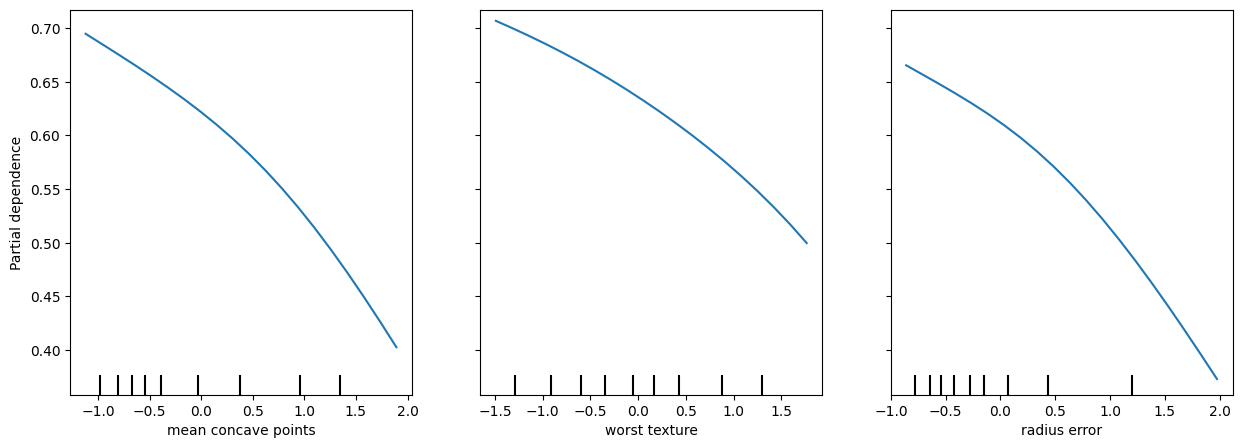

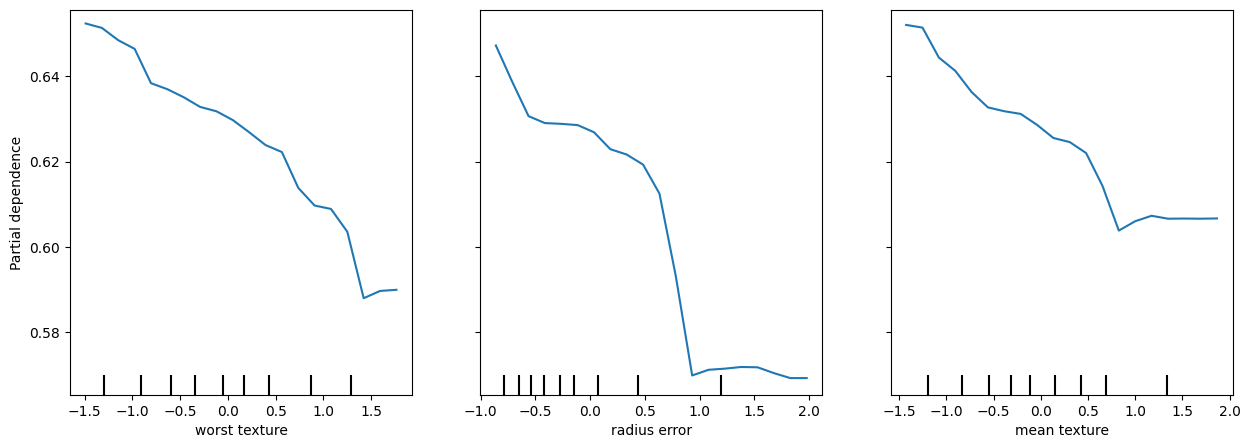

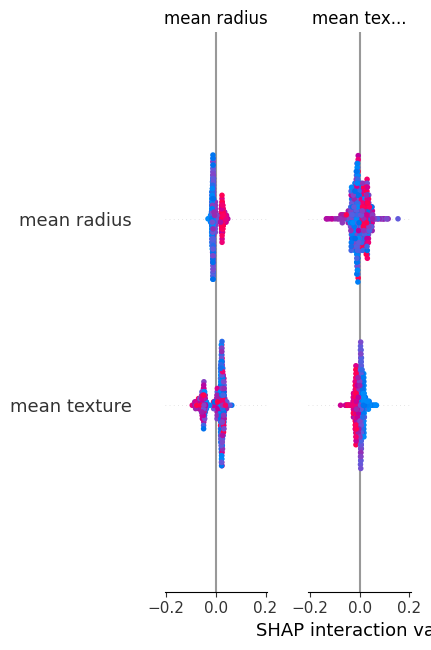

2024-10-07 16:15:42,118 - explainableai.feature_analysis - INFO - Dataframe Created...
2024-10-07 16:15:42,121 - explainableai.core - INFO - Performing cross-validation...
2024-10-07 16:15:42,121 - explainableai.model_evaluation - DEBUG - Cross validation...
2024-10-07 16:15:51,826 - explainableai.model_evaluation - INFO - validated...
2024-10-07 16:15:51,826 - explainableai.core - INFO - Model comparison results:
2024-10-07 16:15:51,826 - explainableai.core - DEBUG - Printing results...
2024-10-07 16:15:51,826 - explainableai.core - INFO - 
Model Performance:
2024-10-07 16:15:51,826 - explainableai.core - INFO - accuracy: 1.0000
2024-10-07 16:15:51,837 - explainableai.core - INFO - f1_score: 1.0000
2024-10-07 16:15:51,837 - explainableai.core - INFO - confusion_matrix:
[[169   0]
 [  0 286]]
2024-10-07 16:15:51,838 - explainableai.core - INFO - classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
          

Results for Random Forest:
{'model_performance': {'accuracy': 1.0, 'f1_score': np.float64(1.0), 'confusion_matrix': array([[169,   0],
       [  0, 286]]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       169\n           1       1.00      1.00      1.00       286\n\n    accuracy                           1.00       455\n   macro avg       1.00      1.00      1.00       455\nweighted avg       1.00      1.00      1.00       455\n'}, 'feature_importance': {'worst texture': np.float64(0.003296703296703285), 'radius error': np.float64(0.001978021978021971), 'mean texture': np.float64(0.001758241758241752), 'area error': np.float64(0.001758241758241752), 'worst concave points': np.float64(0.000879120879120876), 'mean radius': np.float64(0.0), 'mean perimeter': np.float64(0.0), 'mean area': np.float64(0.0), 'mean smoothness': np.float64(0.0), 'mean compactness': np.float64(0.0), 'mean concavity': np.float64(0

2024-10-07 16:15:52,111 - explainableai.core - DEBUG - Fitting the model...
2024-10-07 16:15:52,121 - explainableai.core - INFO - Preprocessing data...
2024-10-07 16:15:52,121 - explainableai.core - DEBUG - Creating Preprocessing Steps...
2024-10-07 16:15:52,121 - explainableai.core - INFO - Pre proccessing completed...
2024-10-07 16:15:52,121 - explainableai.core - DEBUG - Fitting and transforming the data...
2024-10-07 16:15:52,121 - explainableai.core - DEBUG - Updating feature names...
2024-10-07 16:15:52,121 - explainableai.core - INFO - Fitting models and analyzing...
2024-10-07 16:15:52,121 - explainableai.core - DEBUG - Comparing the models...
c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:15:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg,

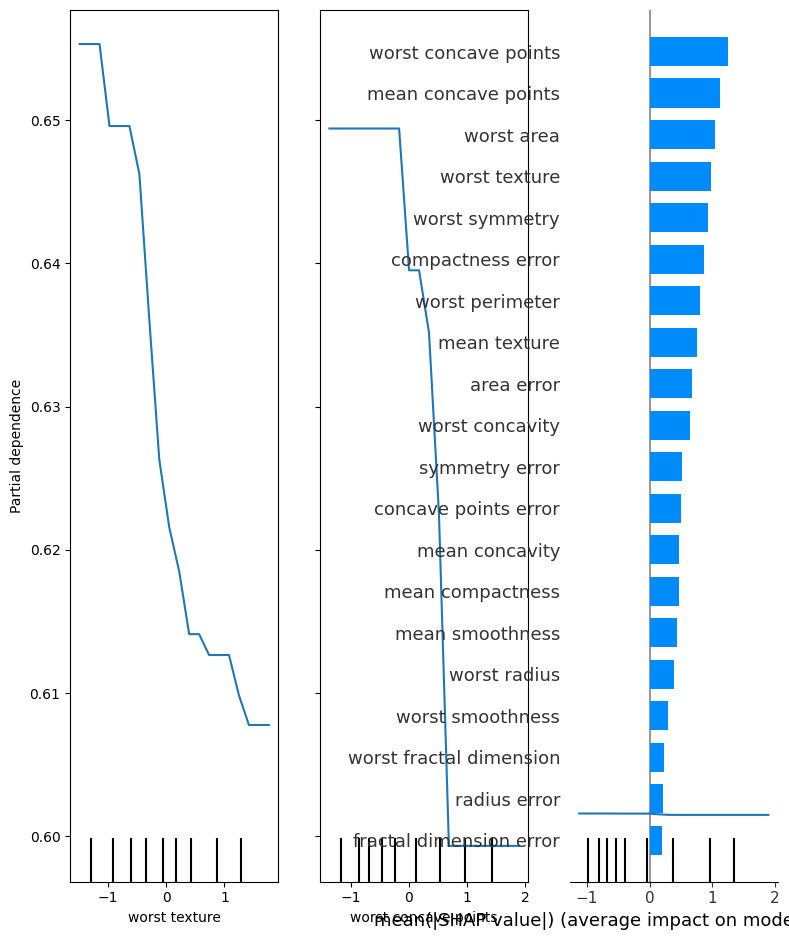

2024-10-07 16:16:01,583 - explainableai.feature_analysis - INFO - Dataframe Created...
2024-10-07 16:16:01,590 - explainableai.core - INFO - Performing cross-validation...
2024-10-07 16:16:01,590 - explainableai.model_evaluation - DEBUG - Cross validation...
c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:16:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Shravya H Jain\Desktop\explain\explainableai\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:16:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Shravya H Jain\Desktop\e

Results for XGBoost:
{'model_performance': {'accuracy': 1.0, 'f1_score': np.float64(1.0), 'confusion_matrix': array([[169,   0],
       [  0, 286]]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       169\n           1       1.00      1.00      1.00       286\n\n    accuracy                           1.00       455\n   macro avg       1.00      1.00      1.00       455\nweighted avg       1.00      1.00      1.00       455\n'}, 'feature_importance': {'worst texture': np.float64(0.013626373626373612), 'worst concave points': np.float64(0.009230769230769199), 'mean concave points': np.float64(0.005934065934065913), 'compactness error': np.float64(0.004835164835164818), 'mean texture': np.float64(0.003296703296703285), 'worst area': np.float64(0.003296703296703285), 'mean compactness': np.float64(0.001538461538461533), 'worst symmetry': np.float64(0.001538461538461533), 'area error': np.float64(0.00131868131

2024-10-07 16:16:02,743 - explainableai.core - DEBUG - Fitting the model...
2024-10-07 16:16:02,743 - explainableai.core - INFO - Preprocessing data...
2024-10-07 16:16:02,745 - explainableai.core - DEBUG - Creating Preprocessing Steps...
2024-10-07 16:16:02,745 - explainableai.core - INFO - Pre proccessing completed...
2024-10-07 16:16:02,745 - explainableai.core - DEBUG - Fitting and transforming the data...
2024-10-07 16:16:02,750 - explainableai.core - DEBUG - Updating feature names...
2024-10-07 16:16:02,751 - explainableai.core - INFO - Fitting models and analyzing...
2024-10-07 16:16:02,752 - explainableai.core - DEBUG - Comparing the models...
2024-10-07 16:16:04,074 - explainableai.core - INFO - Comparing successfully...
2024-10-07 16:16:04,346 - explainableai.core - INFO - Model fitting is complete...
2024-10-07 16:16:04,346 - explainableai.core - DEBUG - Analysing...
2024-10-07 16:16:04,346 - explainableai.core - INFO - Evaluating model performance...
2024-10-07 16:16:04,346

Results for Neural Network (MLP):
{'model_performance': {'accuracy': 1.0, 'f1_score': np.float64(1.0), 'confusion_matrix': array([[169,   0],
       [  0, 286]]), 'classification_report': '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       169\n           1       1.00      1.00      1.00       286\n\n    accuracy                           1.00       455\n   macro avg       1.00      1.00      1.00       455\nweighted avg       1.00      1.00      1.00       455\n'}, 'feature_importance': {'worst symmetry': np.float64(0.02461538461538464), 'worst texture': np.float64(0.020659340659340684), 'worst concavity': np.float64(0.018901098901098902), 'worst concave points': np.float64(0.01692307692307692), 'radius error': np.float64(0.016703296703296712), 'worst area': np.float64(0.01428571428571428), 'compactness error': np.float64(0.013186813186813163), 'area error': np.float64(0.011428571428571399), 'worst radius': np.float64(0.009670329

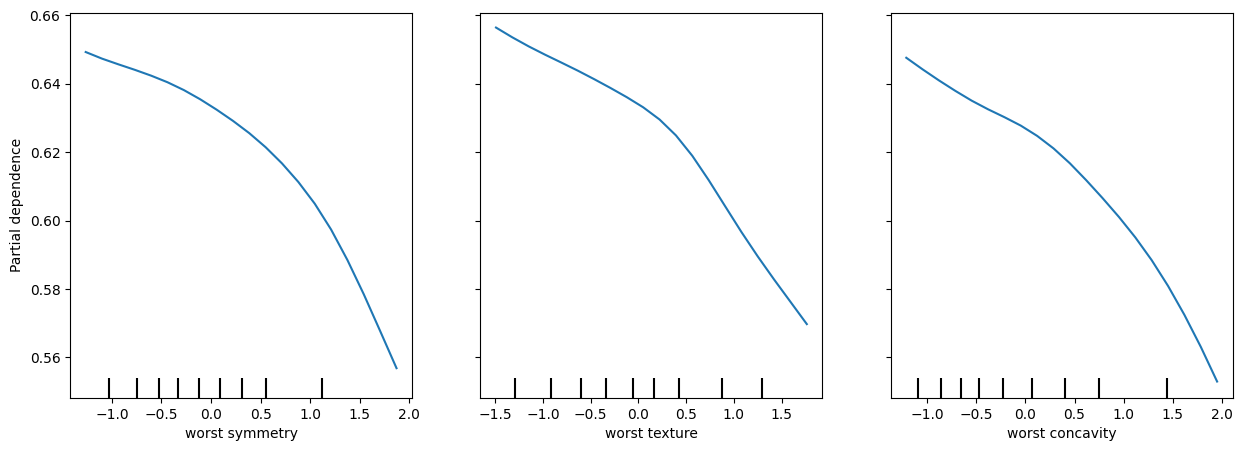

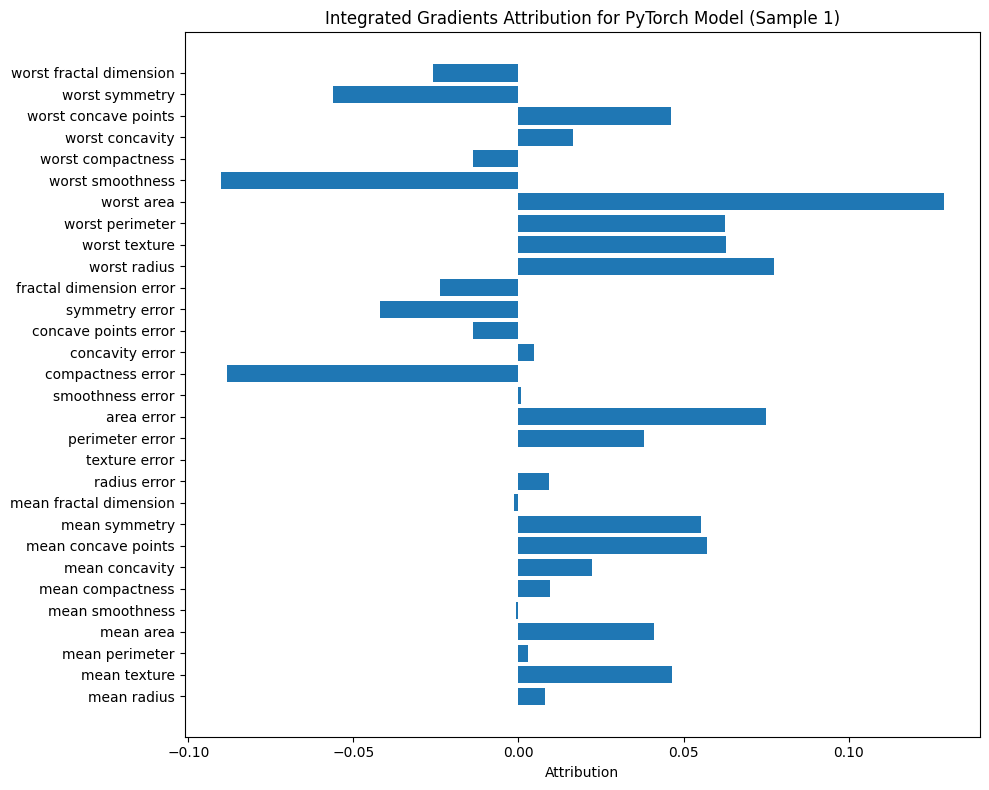

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Attempt to import XAIWrapper; handle if not available
try:
    from explainableai import XAIWrapper
except ImportError:
    XAIWrapper = None
    print("XAIWrapper not found. Make sure the 'explainableai' package is installed.")

# Attempt to import Captum for PyTorch XAI; handle if not available
try:
    from captum.attr import IntegratedGradients
    import matplotlib.pyplot as plt
except ImportError:
    IntegratedGradients = None
    plt = None
    print("Captum or matplotlib not found. Install them using 'pip install captum matplotlib'.")

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Logistic Regression Pipeline without scaler (already scaled)
logistic_regression_pipeline = Pipeline([
    ('logistic_regression', LogisticRegression(solver='saga', max_iter=5000))
])

# Define parameter grid for Logistic Regression with conditional parameters
logistic_regression_params = [
    {
        'logistic_regression__penalty': ['l2'],
        'logistic_regression__C': [0.01, 0.1, 1, 10],
        'logistic_regression__solver': ['saga'],
        'logistic_regression__max_iter': [5000]
    },
    {
        'logistic_regression__penalty': ['elasticnet'],
        'logistic_regression__C': [0.01, 0.1, 1, 10],
        'logistic_regression__solver': ['saga'],
        'logistic_regression__l1_ratio': [0.1, 0.5, 0.9],
        'logistic_regression__max_iter': [5000]
    }
]

# Initialize GridSearchCV for Logistic Regression
logistic_regression_gs = GridSearchCV(
    logistic_regression_pipeline, 
    param_grid=logistic_regression_params,
    cv=5,
    verbose=0,
    n_jobs=-1
)

# Initialize GridSearchCV for Random Forest
random_forest_gs = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid={
        'n_estimators': [1000, 2000, 3000],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    cv=5,
    verbose=0,
    n_jobs=-1
)

# Initialize GridSearchCV for XGBoost
xgboost_gs = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid={
        'n_estimators': [1000, 2000, 3000],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 9],
        'subsample': [0.7, 0.8, 1.0]
    },
    cv=5,
    verbose=0,
    n_jobs=-1
)

# Initialize GridSearchCV for MLPClassifier
mlp_gs = GridSearchCV(
    MLPClassifier(random_state=42),
    param_grid={
        'hidden_layer_sizes': [(100, 50), (128, 64, 32)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'alpha': [0.0001, 0.001],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [3000]
    },
    cv=5,
    verbose=0,
    n_jobs=-1
)

# Fit the models (this may take some time due to extensive hyperparameter grids)
print("Fitting Logistic Regression...")
logistic_regression_gs.fit(X_train_scaled, y_train)
print("Fitting Random Forest...")
random_forest_gs.fit(X_train_scaled, y_train)
print("Fitting XGBoost...")
xgboost_gs.fit(X_train_scaled, y_train)
print("Fitting MLP Classifier...")
mlp_gs.fit(X_train_scaled, y_train)

# Store best models in a dictionary
models = {
    'Logistic Regression': logistic_regression_gs.best_estimator_,
    'Random Forest': random_forest_gs.best_estimator_,
    'XGBoost': xgboost_gs.best_estimator_,
    'Neural Network (MLP)': mlp_gs.best_estimator_
}

# Evaluate the models on the test set
print("\nEvaluating Models on Test Set:")
for model_name, model in models.items():
    if model is not None:
        accuracy = model.score(X_test_scaled, y_test)  # Calculate test accuracy
        print(f"{model_name} Test Accuracy: {accuracy * 100:.2f}%")
    else:
        print(f"{model_name} is None and was not evaluated.")

# Define a simple PyTorch neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Prepare data for PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Initialize and train the PyTorch model
input_size = X.shape[1]
torch_model = SimpleNN(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(torch_model.parameters(), lr=0.001)

print("\nTraining PyTorch Model...")
# Training Loop
for epoch in range(100):  # Adjust the number of epochs as needed
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = torch_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

# Evaluate the PyTorch model
with torch.no_grad():
    torch_model.eval()
    test_outputs = torch_model(X_test_tensor)
    predicted = (test_outputs > 0.5).float()
    accuracy = (predicted.view(-1) == y_test_tensor.view(-1)).float().mean().item()
    print(f"PyTorch Model Test Accuracy: {accuracy * 100:.2f}%")

# XAI Analysis with XAIWrapper for Scikit-learn models
if XAIWrapper is not None:
    try:
        # Create an instance of XAIWrapper
        xai = XAIWrapper()

        # Convert scaled training data back to DataFrame with column names
        X_train_df = pd.DataFrame(X_train_scaled, columns=data.feature_names)

        print("\nPerforming XAI Analysis on Scikit-learn Models:")
        # Perform XAI analysis on the fitted Scikit-learn models
        for model_name, model in models.items():
            if model is not None:
                print(f"\nAnalyzing {model_name}...")
                if hasattr(model, 'predict'):
                    xai.fit(model, X_train_df, y_train)
                    results = xai.analyze()  # Perform the analysis
                    print(f"Results for {model_name}:\n{results}")
                else:
                    print(f"Skipping {model_name}: Model does not have a predict method.")
    except Exception as e:
        print(f"An error occurred during the XAI analysis for Scikit-learn models: {e}")
else:
    print("\nXAIWrapper is not available. Skipping XAI analysis for Scikit-learn models.")

# XAI Analysis for PyTorch model using Captum
if IntegratedGradients is not None and plt is not None:
    def pytorch_xai_analysis(model, X_test, y_test):
        try:
            model.eval()
            ig = IntegratedGradients(model)
            # Select a sample or a subset for analysis
            sample = X_test[:1]  # Analyze the first test sample
            attributions, delta = ig.attribute(sample, target=0, return_convergence_delta=True)
            attributions = attributions.squeeze().numpy()

            # Plot attributions
            feature_names = data.feature_names
            plt.figure(figsize=(10, 8))
            plt.barh(feature_names, attributions)
            plt.xlabel('Attribution')
            plt.title('Integrated Gradients Attribution for PyTorch Model (Sample 1)')
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"An error occurred during the PyTorch XAI analysis: {e}")

    print("\nPerforming XAI Analysis on PyTorch Model using Captum:")
    pytorch_xai_analysis(torch_model, X_test_tensor, y_test_tensor)
else:
    print("\nCaptum or matplotlib not available. Skipping XAI analysis for PyTorch model.")
